# Data Augmentation

In [24]:
train_data = trainer.get_training_data(dataset_size=10)["images"]

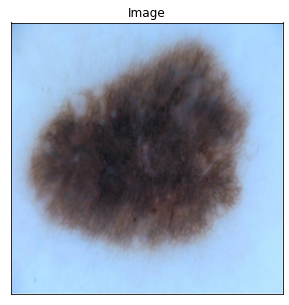

In [25]:
Visualisation().plot_images(image=train_data[0].squeeze())

## Advanced Augmentation

In [26]:
from utils.augmentation import DataAugmentation

data_augmentation = DataAugmentation()
augmented_image = data_augmentation.apply_advanced(train_data[0])

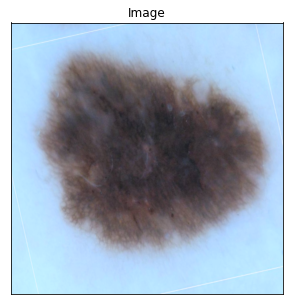

In [27]:
Visualisation().plot_images(image=augmented_image.squeeze())

## Hair Augmentation

In [28]:
from utils.augmentation import AdvancedHairAugmentation

augmented_image = AdvancedHairAugmentation().apply(train_data[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


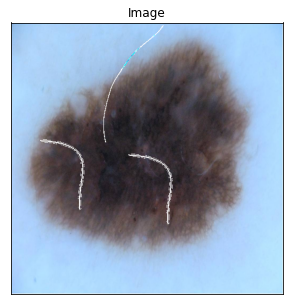

In [29]:
Visualisation().plot_images(image=augmented_image.squeeze())